# K-Nearest Neighbors (KNN) Classifier

In [1]:
import sys
import os

current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', '..', 'src')

sys.path.append(src_dir)

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from utils.plotDecisionRegions import plot_decision_regions

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # Grab second and third features (petal length and petal width)
y = iris.target

print('Class labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 30% test data & 70% training data
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/classification/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


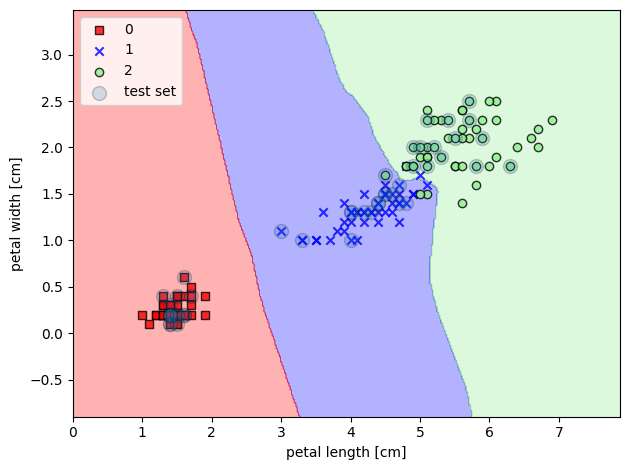

In [5]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Learnings
My summary of KNN below:

![knn](../../images/wojak-caveman.jpeg)

KNN works by "memorizing" the dataset and then during the classification step, the model will choose $K$ nearest examples in the training set. It will then classify the input based a voting system, in which the majority class of the chosen samples is what the new input will be classified as. The example above uses minkowski with a p-value of 2, which is a generalization of the Euclidean distance.

Due to the nature of how KNN works, its processing and memory requirements linearly increase with the size of the dataset. Also this model can fall victim to the curse of dimensionality, as the distance between points becomes less meaningful in higher dimensions. This means that when using a KNN, it's usually a good idea to use things like feature selection or dimensionality reduction to reduce the number of features.